In [1]:
import pandas as pd
import os, sys
from sklearn.datasets import make_regression

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.predictor import NoventisManualPredictor

In [2]:
predictor = NoventisManualPredictor(
    model_name=['xgboost', 'lightgbm', 'random_forest'],
    task='classification',
    tune_hyperparameters=True,  # Mengaktifkan pencarian parameter terbaik dengan Optuna
    n_trials=15,                # Jumlah percobaan tuning (gunakan >50 untuk hasil serius)
    output_dir='manual_run_results', # Menyimpan semua output di folder ini
    random_state=42
)

INFO:root:Output directory created at: manual_run_results/run_20251005_044438
INFO:root:ManualPredictor initialized for classification


In [3]:
df_class = pd.read_csv('../dataset_for_examples/dummy_classification_churn.csv')

In [ ]:
results = predictor.fit(
    df=df_class,
    target_column='churn',
    test_size=0.2,
    compare=True,  
    explain=True,
    display_report=True
     
)

INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=400, Test=100
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:--- Processing model: XGBOOST ---
INFO:root:Starting hyperparameter tuning for XGBOOST...


In [ ]:
# predictor_clf = ManualPredictor(
#     model_name=['decision_tree', 'random_forest', 'xgboost'],
#     task='classification',
#     tune_hyperparameters=False, # Aktifkan tuning otomatis
#     n_trials=15,               # Coba 15 kombinasi parameter untuk setiap model
#     cv_folds=3,                # Gunakan 3-fold cross-validation untuk tuning
#     display_report=True        # Tampilkan dashboard interaktif setelah selesai
# )


In [ ]:
predictor_clf = ManualPredictor(
    model_name=['decision_tree', 'random_forest', 'xgboost'],
    task='classification',
    tune_hyperparameters=False, # Aktifkan tuning otomatis
    # n_trials=15,               # Coba 15 kombinasi parameter untuk setiap model
    # cv_folds=3,                # Gunakan 3-fold cross-validation untuk tuning
)


df_class = pd.read_csv('dummy_classification_churn.csv')
classification_results = predictor_clf.run_pipeline(
    df=df_class,
    target_column='churn',
    display_report=True
)


In [4]:
predictor_reg = NoventisManualPredictor(
    model_name=['linear_regression', 'random_forest', 'lightgbm'],
    task='regression',
    tune_hyperparameters=False # Aktifkan tuning otomatis
    # n_trials=15,               # Coba 15 kombinasi parameter untuk setiap model
    # cv_folds=3,                # Gunakan 3-fold cross-validation untuk tuning
    # display_report=True        # Tampilkan dashboard interaktif setelah selesai
)


INFO:root:ManualPredictor initialized for regression


INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=240, Test=60
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LINEAR_REGRESSION
INFO:root:Training finished in 0.00 seconds.
INFO:root:Processing model: RANDOM_FOREST
INFO:root:Training finished in 0.56 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Training finished in 0.26 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: LINEAR_REGRESSION with r2_score = 0.9923
INFO:root:Preparing report for display in output cell...


,mae,mse,rmse,r2_score
model,,,,
linear_regression,12.9023,241.1078,15.5276,0.9923
lightgbm,46.4418,4097.0196,64.0080,0.8691
random_forest,65.0477,7013.0301,83.7438,0.7759

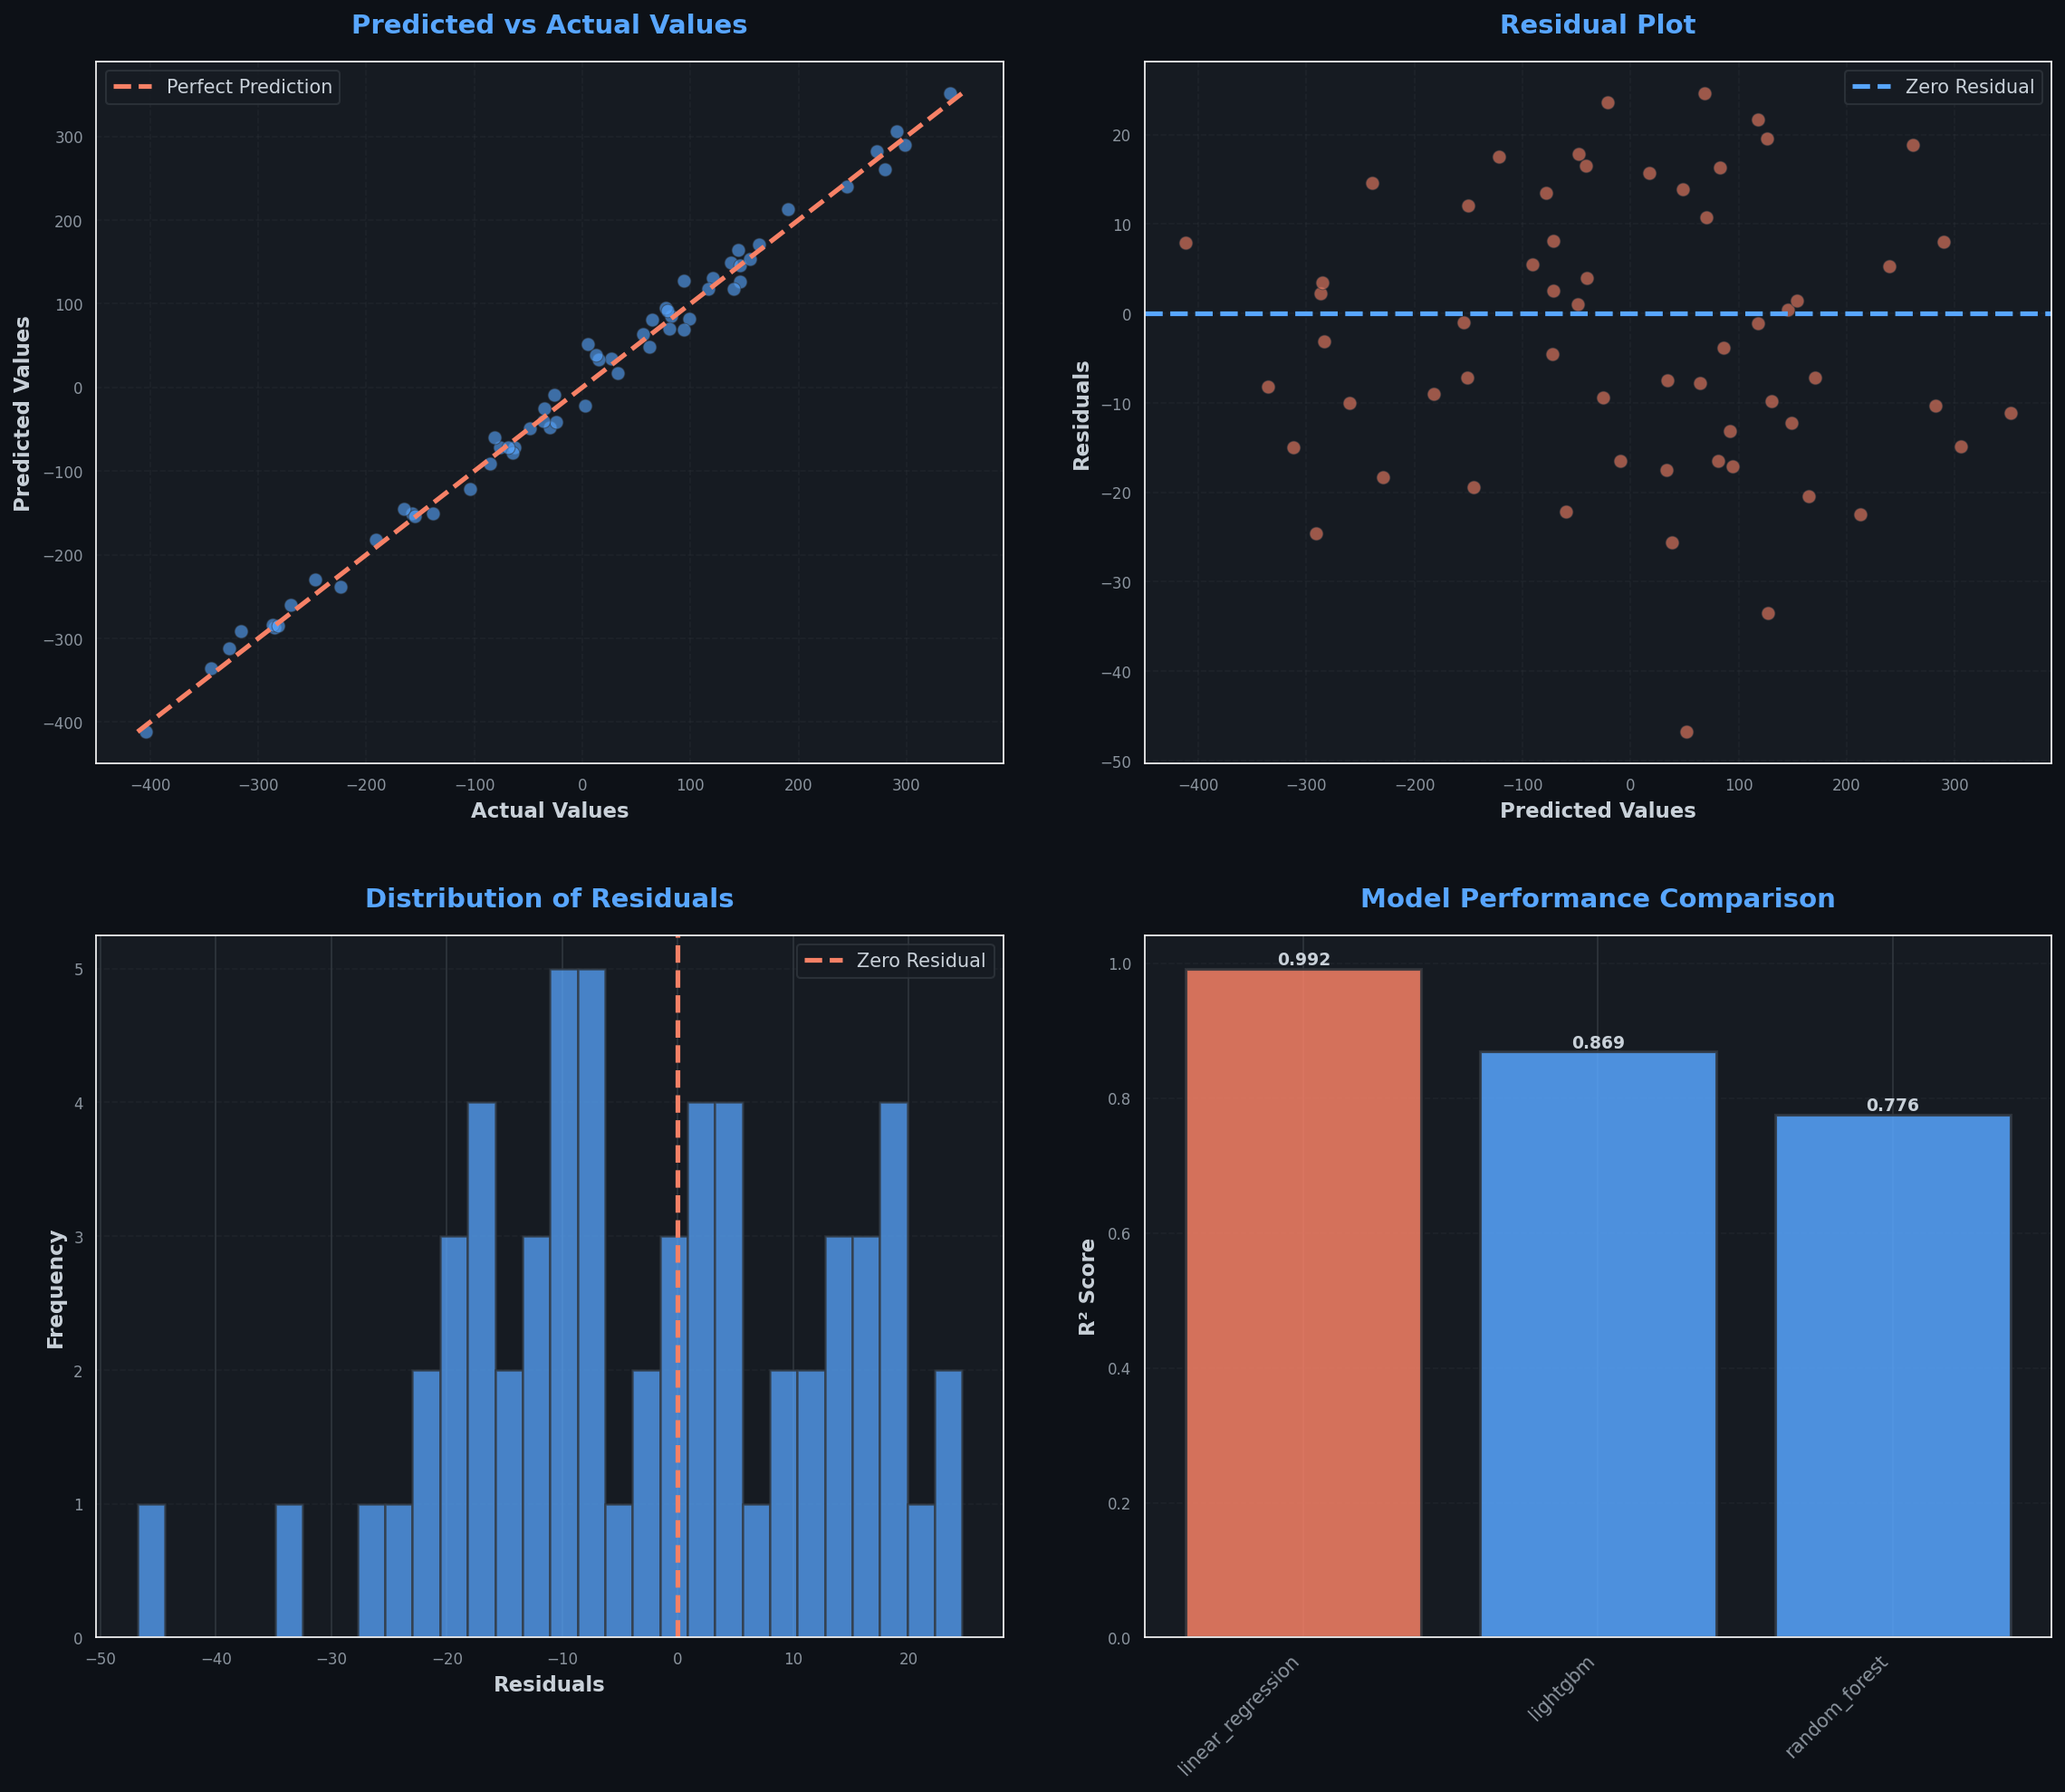
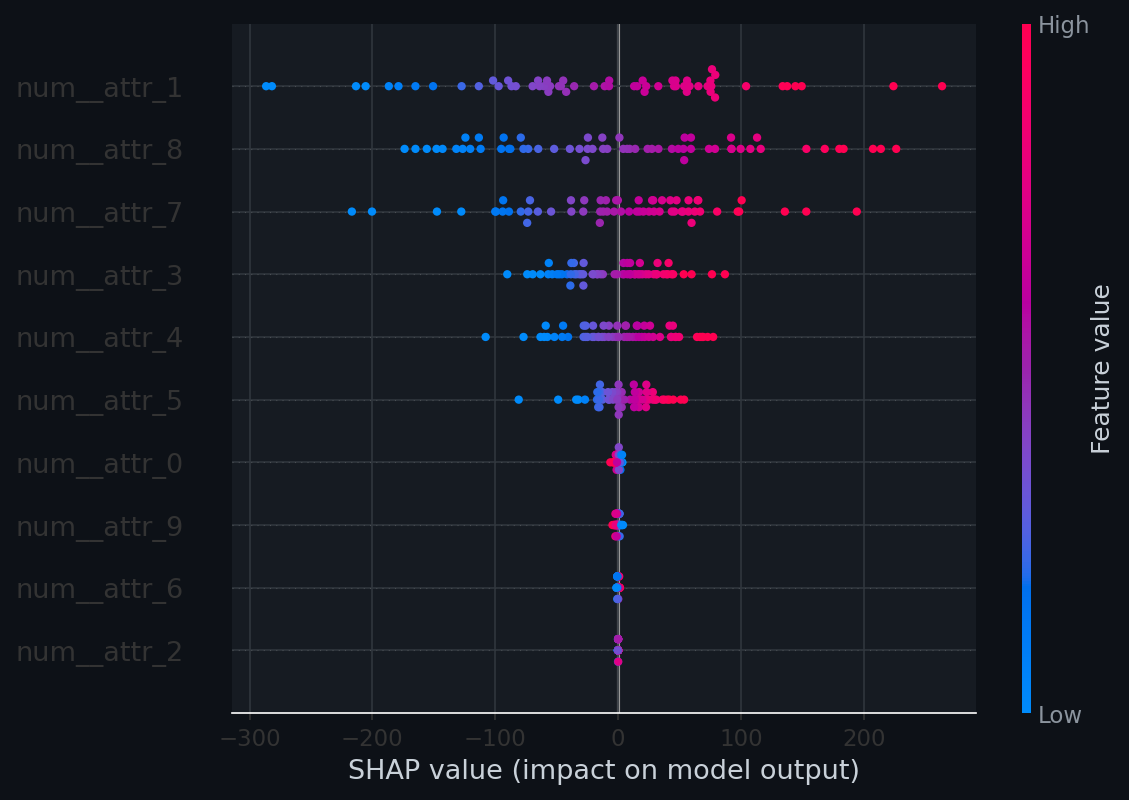

INFO:root:Report displayed successfully.


In [5]:
df_reg = pd.read_csv('../dataset_for_examples/dummy_regression_house_price.csv')
reg_results = predictor_reg.fit(
    df=df_reg,
    target_column='house_price',
    display_report=True
)
